In [1]:
library(igraph)
library(fingraph)
library(fitHeavyTail)
library(xts)
set.seed(123)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [2]:
crypto_prices <- readRDS("crypto-prices.rds")

In [3]:
head(crypto_prices)

                        BTC     ETH      XRP     USDT     LTC     BCH      BNB
2017-08-01 08:00:00 2718.26 226.769 0.177053 0.996819 43.0363 380.010 0.099867
2017-08-02 08:00:00 2710.67 219.952 0.173113 1.001430 42.1322 452.657 0.100452
2017-08-03 08:00:00 2804.73 225.342 0.174612 0.969304 42.8615 364.048 0.106642
2017-08-04 08:00:00 2895.89 223.073 0.173743 1.004350 43.4497 233.046 0.107494
2017-08-05 08:00:00 3252.91 256.507 0.184737 0.998314 46.8590 213.147 0.128871
2017-08-06 08:00:00 3213.94 261.567 0.180444 1.001040 45.1030 220.656 0.130999
                         XLM     EOS     XMR      XEM      NEO    DASH   WAVES
2017-08-01 08:00:00 0.017933 1.78116 44.1457 0.181054  7.86030 184.754 3.01355
2017-08-02 08:00:00 0.018413 1.77841 43.6297 0.219719  8.10865 182.934 3.50913
2017-08-03 08:00:00 0.018860 1.80398 43.3553 0.226890 10.67460 186.987 3.84409
2017-08-04 08:00:00 0.022241 1.80539 45.1239 0.224240 10.42590 186.974 3.67420
2017-08-05 08:00:00 0.023984 1.90932 48.5783 0.22865

In [4]:
colnames(crypto_prices)

[1] "BTC"   "ETH"   "XRP"   "USDT"  "LTC"   "BCH"   "BNB"   "XLM"   "EOS"  
[10] "XMR"   "XEM"   "NEO"   "DASH"  "WAVES" "MIOTA" "ZEC"   "ETC"   "GNO"  
[19] "OMG"   "DOGE"  "BAT"   "DCR"   "DGB"   "QTUM"  "REP"   "LSK"   "SC"   
[28] "NANO"  "ANT"   "SNT"   "ZEN"   "MAID"  "GNT"   "XVG"   "BNT"   "MONA" 
[37] "RLC"   "STORJ" "STEEM" "KMD"   "BTS"

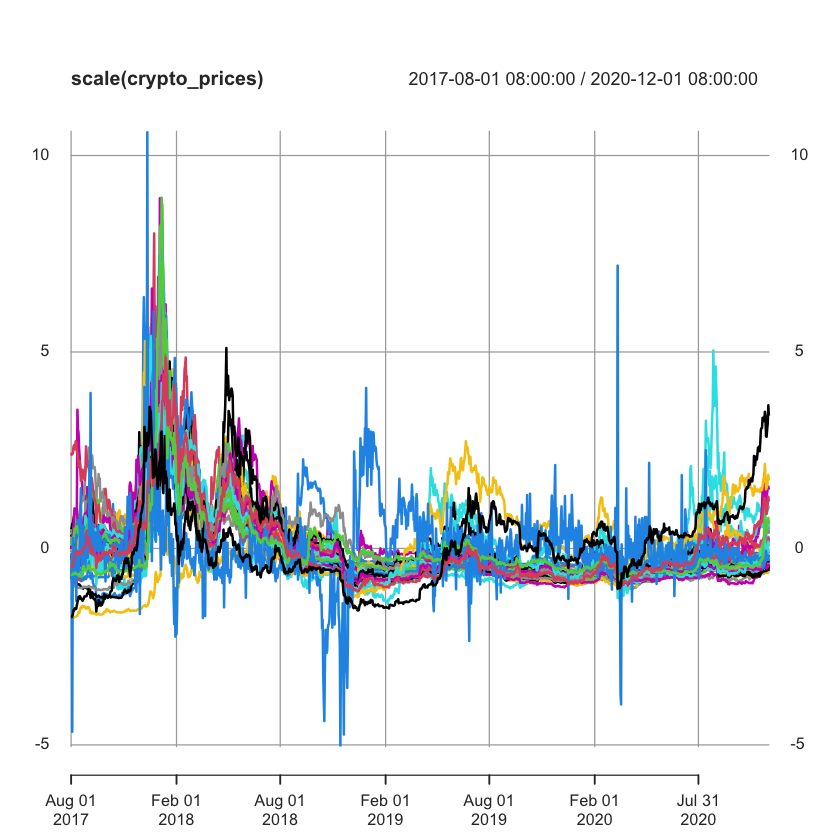

In [5]:
plot(scale(crypto_prices))

In [6]:
X <- diff(log(crypto_prices), na.pad = FALSE)
p <- ncol(X)

In [ ]:
graph_mrf <- learn_kcomp_heavytail_graph(scale(X),
                                         k = 7,
                                         heavy_type = "student",
                                         nu = fit_mvt(scale(X), nu="MLE-diag-resample")$nu,
                                         verbose = FALSE)

In [ ]:
graph_mrf$convergence

In [ ]:
net <- graph_from_adjacency_matrix(graph_mrf$adjacency,
                                   mode = "undirected",
                                   weighted = TRUE)
cfg <- cluster_fast_greedy(as.undirected(net))
la_kcomp <- layout_nicely(net)
V(net)$label.cex = 1
plot(cfg, net, vertex.label = colnames(crypto_prices),
     layout = la_kcomp,
     vertex.size = 4.5,
     col = "black", 
     edge.color = c("#686de0"),
     vertex.label.family = "Helvetica",
     vertex.label.color = "black",
     vertex.label.dist = 1.25,
     vertex.shape = "circle",
     edge.width = 20*E(net)$weight,
     edge.curved = 0.1)

In [ ]:
modularity(cfg)